Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

-> Polynomial function is one of the type of kernel function 

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

-> We can implement the polynomial kernel using the Scikit-learn library as follows : 

Accuracy: 0.84
Confusion Matrix:
 [[41  9]
 [ 7 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.83      0.86      0.84        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



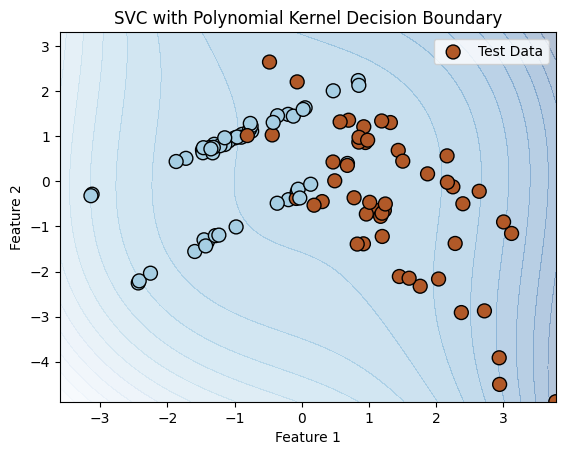

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Support Vector Classification (SVC) with polynomial kernel
model = SVC(kernel='poly', degree=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.Blues, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100, label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC with Polynomial Kernel Decision Boundary')
plt.legend()
plt.show()


Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

-> If we increase the value of epsilon than the best fit line and thereby the marginal plane changes , more is the value of epsilon , lesser will be the accuracy (only upto certain point) and less accurate will be the best fit line , marginal plane and the support vector 

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

-> The best parameter can be decided by the grid search cv , and selecting the right parameter will increase the accuracy of the model , we can increase the value of c and epsilon if the dataset is more overlapping and decrease it if it is not overlapping .

Q5. Assignment:
L Import the necessary libraries and load the dataseg
L Split the dataset into training and testing setZ
L Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
L Create an instance of the SVC classifier and train it on the training datW
L hse the trained classifier to predict the labels of the testing datW
L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performanc_
L Train the tuned classifier on the entire dataseg
L Save the trained classifier to a file for future use.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import joblib

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC()

# Train the model on the training data
svc.fit(X_train_scaled, y_train)

# Use the trained classifier to predict labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Train the tuned classifier on the entire dataset
X_scaled = scaler.transform(X)
best_svc.fit(X_scaled, y)

# Save the trained classifier to a file for future use
joblib.dump(best_svc, 'tuned_svc_model.pkl')


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


['tuned_svc_model.pkl']